In [214]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "ticks")


In [215]:
data = pd.read_csv('./marvel-wikia-data.csv', sep=",")

In [216]:
data.shape

(16376, 13)

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [218]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [219]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [220]:
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [221]:
totalCount = data.shape[0]
print("Всего строк: {}" .format(totalCount))

Всего строк: 16376


In [222]:
catCols = []
for col in data.columns:
    tempNullCount = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if tempNullCount>0:
        catCols.append(col)
        temp_perc = round((tempNullCount / totalCount) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, tempNullCount, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3770, 23.02%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2812, 17.17%.
Колонка EYE. Тип данных object. Количество пустых значений 9767, 59.64%.
Колонка HAIR. Тип данных object. Количество пустых значений 4264, 26.04%.
Колонка SEX. Тип данных object. Количество пустых значений 854, 5.21%.
Колонка GSM. Тип данных object. Количество пустых значений 16286, 99.45%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.02%.
Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1096, 6.69%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 815, 4.98%.
Колонка Year. Тип данных float64. Количество пустых значений 815, 4.98%.


In [223]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [224]:
hair_data = data[['HAIR']]
hair_data.head()

,HAIR
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair


In [225]:
hair_data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [226]:
hair_data[hair_data['HAIR'].isnull()].shape

(4264, 1)

In [227]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data_imp = imp.fit_transform(hair_data)
data_imp

array([['Brown Hair'],
       ['White Hair'],
       ['Black Hair'],
       ...,
       ['Bald'],
       ['Black Hair'],
       ['Black Hair']], dtype=object)

In [228]:
np.unique(data_imp)

array(['Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair',
       'Bronze Hair', 'Brown Hair', 'Dyed Hair', 'Gold Hair',
       'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair',
       'No Hair', 'Orange Hair', 'Orange-brown Hair', 'Pink Hair',
       'Purple Hair', 'Red Hair', 'Reddish Blond Hair', 'Silver Hair',
       'Strawberry Blond Hair', 'Variable Hair', 'White Hair',
       'Yellow Hair'], dtype=object)

In [229]:
data_imp.shape

(16376, 1)

In [230]:
hair_enc = pd.DataFrame({"HAIR": data_imp.T[0]})
hair_enc

,HAIR
0,Brown Hair
1,White Hair
2,Black Hair
3,Black Hair
4,Blond Hair
...,...
16371,No Hair
16372,Bald
16373,Bald
16374,Black Hair


In [231]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
hair_ohe = ohe.fit_transform(hair_enc[['HAIR']])

In [232]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
hair_ohe = ohe.fit_transform(hair_enc[['HAIR']])

In [233]:
hair_ohe.shape

(16376, 25)

In [234]:
hair_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,

In [235]:
pd.get_dummies(hair_enc).head()

,HAIR_Auburn Hair,HAIR_Bald,HAIR_Black Hair,HAIR_Blond Hair,HAIR_Blue Hair,HAIR_Bronze Hair,HAIR_Brown Hair,HAIR_Dyed Hair,HAIR_Gold Hair,HAIR_Green Hair,...,HAIR_Orange-brown Hair,HAIR_Pink Hair,HAIR_Purple Hair,HAIR_Red Hair,HAIR_Reddish Blond Hair,HAIR_Silver Hair,HAIR_Strawberry Blond Hair,HAIR_Variable Hair,HAIR_White Hair,HAIR_Yellow Hair
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
pd.get_dummies(hair_data, dummy_na=True).head()

,HAIR_Auburn Hair,HAIR_Bald,HAIR_Black Hair,HAIR_Blond Hair,HAIR_Blue Hair,HAIR_Bronze Hair,HAIR_Brown Hair,HAIR_Dyed Hair,HAIR_Gold Hair,HAIR_Green Hair,...,HAIR_Pink Hair,HAIR_Purple Hair,HAIR_Red Hair,HAIR_Reddish Blond Hair,HAIR_Silver Hair,HAIR_Strawberry Blond Hair,HAIR_Variable Hair,HAIR_White Hair,HAIR_Yellow Hair,HAIR_nan
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
from sklearn.preprocessing import LabelEncoder

In [238]:
hair_enc["HAIR"].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', 'Orange Hair',
       'Pink Hair', 'Variable Hair', 'Yellow Hair', 'Light Brown Hair',
       'Magenta Hair', 'Bronze Hair', 'Dyed Hair', 'Orange-brown Hair'],
      dtype=object)

In [239]:
le = LabelEncoder()
hair_le = le.fit_transform(hair_enc["HAIR"])

In [240]:
hair_le

array([ 6, 23,  2, ...,  1,  2,  2])

In [241]:
np.unique(hair_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [242]:
le.inverse_transform([n for n in range(17)])

array(['Auburn Hair', 'Bald', 'Black Hair', 'Blond Hair', 'Blue Hair',
       'Bronze Hair', 'Brown Hair', 'Dyed Hair', 'Gold Hair',
       'Green Hair', 'Grey Hair', 'Light Brown Hair', 'Magenta Hair',
       'No Hair', 'Orange Hair', 'Orange-brown Hair', 'Pink Hair'],
      dtype=object)

In [243]:
data_digit = hair_enc.copy()
data_digit["HAIR"] = hair_le

In [244]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [245]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_digit[["HAIR"]])

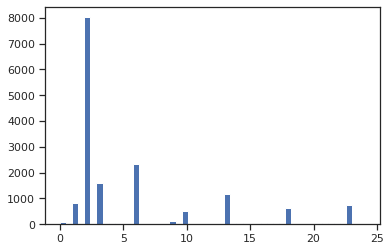

In [246]:
plt.hist(data_digit["HAIR"], 50)
plt.show()

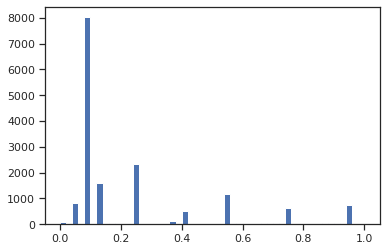

In [247]:
plt.hist(sc1_data, 50)
plt.show()

In [248]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_digit[["HAIR"]])

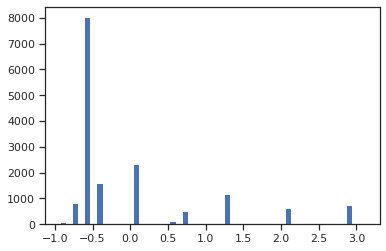

In [249]:
plt.hist(sc2_data, 50)
plt.show()